In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import h5py

import sys
sys.path.append('../')
import analysis_utils as utils
utils.load_plotting_setting()

import calc_gas_collision_spectrum as calc_gas

In [2]:
import importlib
importlib.reload(utils)
importlib.reload(calc_gas)

<module 'calc_gas_collision_spectrum' from '/Users/yuhan/work/nanospheres/gas_collisiions/analysis_notebooks/../calc_gas_collision_spectrum.py'>

In [143]:
sphere = 'sphere_20260105'
amp2kev = 6792.86423779262

def read_recon(file):
    f = h5py.File(file, 'r')
    try:
        pressure = f['data_processed'].attrs['pressure_mbar']

        amps = f['data_processed']['amplitude'][:]
        good_detection = f['data_processed']['good_detection'][:]
        noise_level_amp = f['data_processed']['noise_level_amp'][:]
        chi2 = f['data_processed']['chisquare'][:]
        f_res = f['data_processed']['f_res'][:]
        driven_power = f['data_processed']['driven_power'][:]

        f.close()

        return amps, good_detection, noise_level_amp, chi2, f_res, driven_power, pressure
    except:
        f.close()

def read_recon_all(dataset, type, file_prefix, nfiles):
    amps_all, good_detection_all, noise_level_all, chi2_all, driven_power_all, f_res_all, pressure_all = [], [], [], [], [], [], []
    for i in range(nfiles):
        file = rf'/Users/yuhan/work/nanospheres/data/gas_data_processed/{sphere}/{type}/{dataset}/{file_prefix}{i}_processed.hdf5'
        amps, good_detection, noise_level_amp, chi2, f_res, driven_power, pressure = read_recon(file)

        amps_all.append(amps)
        good_detection_all.append(good_detection)
        noise_level_all.append(noise_level_amp)
        chi2_all.append(chi2)
        driven_power_all.append(driven_power)
        f_res_all.append(f_res)
        pressure_all.append(pressure)

    return amps_all, good_detection_all, noise_level_all, chi2_all, driven_power_all, f_res_all, pressure_all

def get_summed_histogram(amps, good_detection, noise_level_amp, chi2, driven_power, f_res, amp2kev):
    noise_threshold_kev = 75
    chi2_threshold = 700
    normalized_drive_power_threshold = 1.75e-8

    drive_freq = 137000
    ref_freq = 48500

    bins = np.arange(0, 10000, 25)  # keV
    bc = 0.5 * (bins[:-1] + bins[1:])
    hh_all = np.zeros_like(bc, dtype=np.int64)

    for i in range(len(good_detection)):
        _good_window = np.logical_and(good_detection[i], noise_level_amp[i]*amp2kev < noise_threshold_kev)
    
        normalized_drive_power = driven_power[i] * (f_res[i]**2 - drive_freq**2)**2 / ((ref_freq**2 - drive_freq**2)**2)
        good_window = np.logical_and(_good_window, normalized_drive_power > normalized_drive_power_threshold)

        _good_amps = amps[i][good_window]
        _good_amps_chi2 = chi2[i][good_window]

        good_amps = _good_amps[_good_amps_chi2 < chi2_threshold]
        _hh, _ = np.histogram(np.abs(good_amps) * amp2kev, bins)

        hh_all += _hh

    return bc, hh_all


# def get_summed_histogram(dataset, type, file_prefix, nfiles, amp2kev, noise_threshold_kev=200):
#     bins = np.arange(0, 10000, 25)  # keV
#     bc = 0.5 * (bins[:-1] + bins[1:])

#     hh_all = np.zeros_like(bc, dtype=np.int64)
#     pressures = []
#     for i in range(nfiles):
#         file = rf'/Users/yuhan/work/nanospheres/data/gas_data_processed/{sphere}/{type}/{dataset}/{file_prefix}{i}_processed.hdf5'
#         amps, good_detection, noise_level_amp, chi2, f_res, driven_power, pressure = read_recon(file)

#         good_window = np.logical_and(good_detection, noise_level_amp*amp2kev < noise_threshold_kev)
#         _hh, _ = np.histogram(np.abs(amps[good_window].flatten()) * amp2kev, bins)
#         hh_all += _hh

#     return bc, hh_all

# def get_average_pressure(dataset, type, file_prefix, nfiles):
#     sphere = 'sphere_20260105'
#     # data_dir = rf'/Volumes/LaCie/gas_collisions/{type}/{sphere}/{dataset}'
#     data_dir = rf'/Users/yuhan/work/nanospheres/data/gas_collisions/{type}/{sphere}/{dataset}'

#     pressures = np.empty(nfiles)
#     for i in range(nfiles):
#         file = os.path.join(data_dir, f'{file_prefix}{i}.hdf5')
#         f = h5py.File(file, "r")

#         pressures[i] = f['data'].attrs['pressure_mbar']

#     return np.mean(pressures)

In [73]:
amps_0, good_detection_0, noise_level_0, chi2_0, driven_power_0, f_res_0, pressure_0 = read_recon_all('20260107_p8e_4e-8mbar', 'background_data', '20260107_df_', 150)
amps_1, good_detection_1, noise_level_1, chi2_1, driven_power_1, f_res_1, pressure_1 = read_recon_all('20260107_p8e_3e-8mbar_valveclosed', 'background_data', '20260107_df_', 150)

amps_2, good_detection_2, noise_level_2, chi2_2, driven_power_2, f_res_2, pressure_2 = read_recon_all('20260107_p8e_5e-8mbar', 'xenon_data', '20260107_df_', 150)
amps_3, good_detection_3, noise_level_3, chi2_3, driven_power_3, f_res_3, pressure_3 = read_recon_all('20260107_p8e_6e-8mbar', 'xenon_data', '20260107_df_', 150)
amps_4, good_detection_4, noise_level_4, chi2_4, driven_power_4, f_res_4, pressure_4 = read_recon_all('20260107_p8e_8e-8mbar', 'xenon_data', '20260107_df_', 150)
amps_5, good_detection_5, noise_level_5, chi2_5, driven_power_5, f_res_5, pressure_5 = read_recon_all('20260107_p8e_1e-7mbar', 'xenon_data', '20260107_df_', 150)
amps_6, good_detection_6, noise_level_6, chi2_6, driven_power_6, f_res_6, pressure_6 = read_recon_all('20260107_p8e_2e-7mbar', 'xenon_data', '20260107_df_', 150)


In [74]:
datsets_all = ['BG_20260107_p8e_4e-8mbar', 'BG_20260107_p8e_3e-8mbar_valveclosed', '20260107_p8e_5e-8mbar', '20260107_p8e_6e-8mbar', '20260107_p8e_8e-8mbar', '20260107_p8e_1e-7mbar', '20260107_p8e_2e-7mbar']

amps_all = [amps_0, amps_1, amps_2, amps_3, amps_4, amps_5, amps_6]
f_res_all = [f_res_0, f_res_1, f_res_2, f_res_3, f_res_4, f_res_5, f_res_6]
driven_power_all = [driven_power_0, driven_power_1, driven_power_2, driven_power_3, driven_power_4, driven_power_5, driven_power_6]
noise_level_all = [noise_level_0, noise_level_1, noise_level_2, noise_level_3, noise_level_4, noise_level_5, noise_level_6]
chi2_all = [chi2_0, chi2_1, chi2_2, chi2_3, chi2_4, chi2_5, chi2_6]


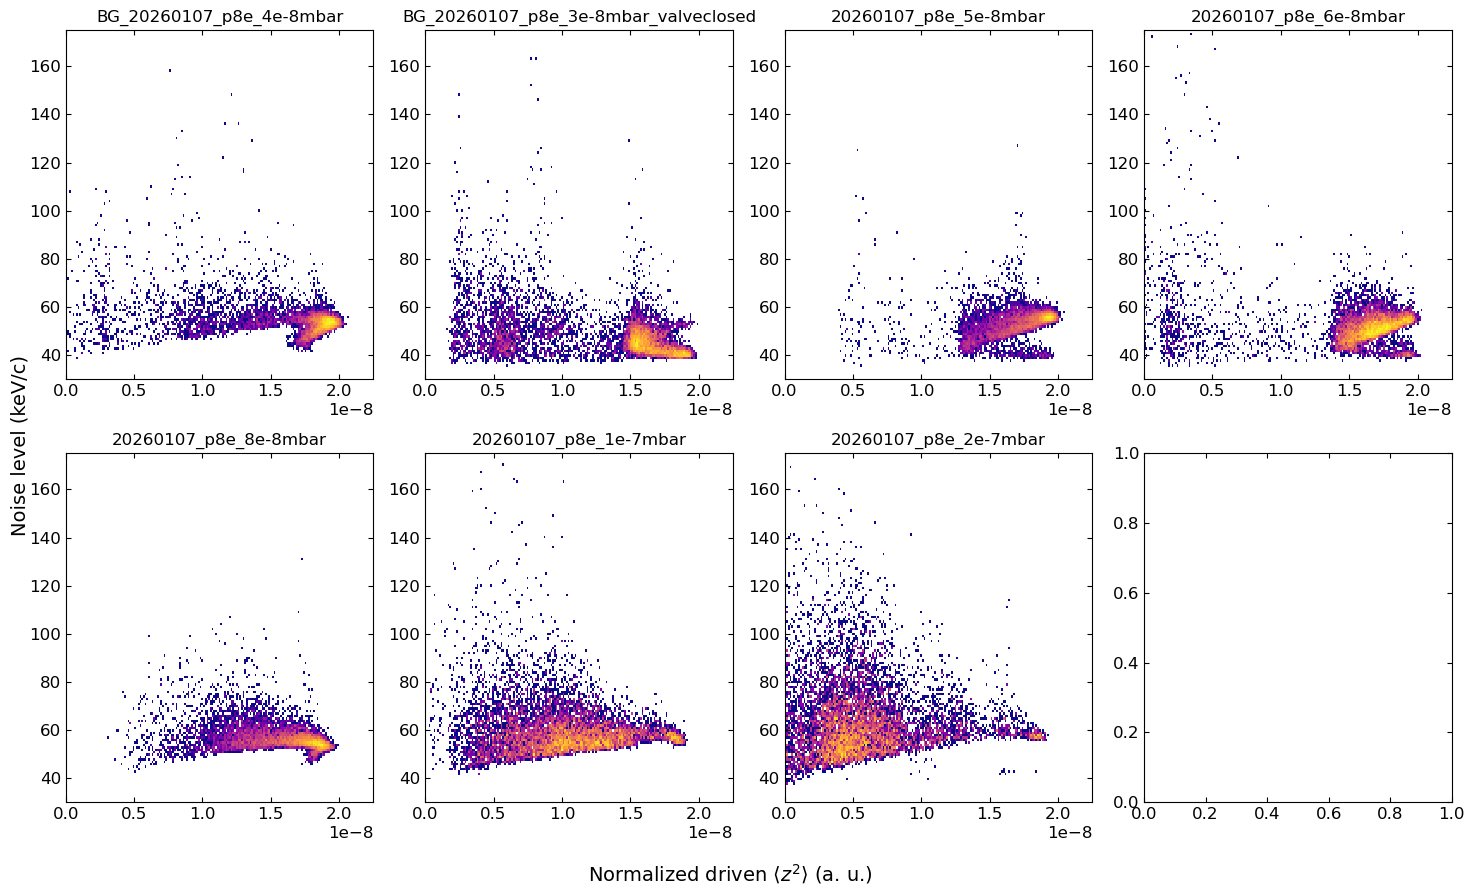

In [75]:
import matplotlib.colors as colors
xbins = np.linspace(0, 2.5e-8, 200)
ybins = np.linspace(0, 200, 200)

fig, axes = plt.subplots(2, 4, figsize=(15, 9))
for i in range(len(driven_power_all)):
    ax = axes.flatten()[i]

    _drive = np.concatenate(driven_power_all[i])
    _freq  = np.concatenate(f_res_all[i])
    drive_freq = 137000
    ref_freq = 48500
    normalized_drive_power = _drive * (_freq**2 - drive_freq**2)**2 / ((ref_freq**2 - drive_freq**2)**2)

    hh, _, _ = np.histogram2d(x=normalized_drive_power, y=np.concatenate(noise_level_all[i])*amp2kev, bins=(xbins, ybins))
    pc = ax.pcolormesh(xbins, ybins, hh.T, norm=colors.LogNorm(), cmap='plasma')

    ax.set_xlim(0, 2.25e-8)
    ax.set_ylim(30, 175)
    ax.set_title(datsets_all[i], fontsize=12)

fig.supxlabel(r'Normalized driven $\langle z^2 \rangle$ (a. u.)', fontsize=14)
fig.supylabel(r'Noise level (keV/c)', fontsize=14)
fig.tight_layout()


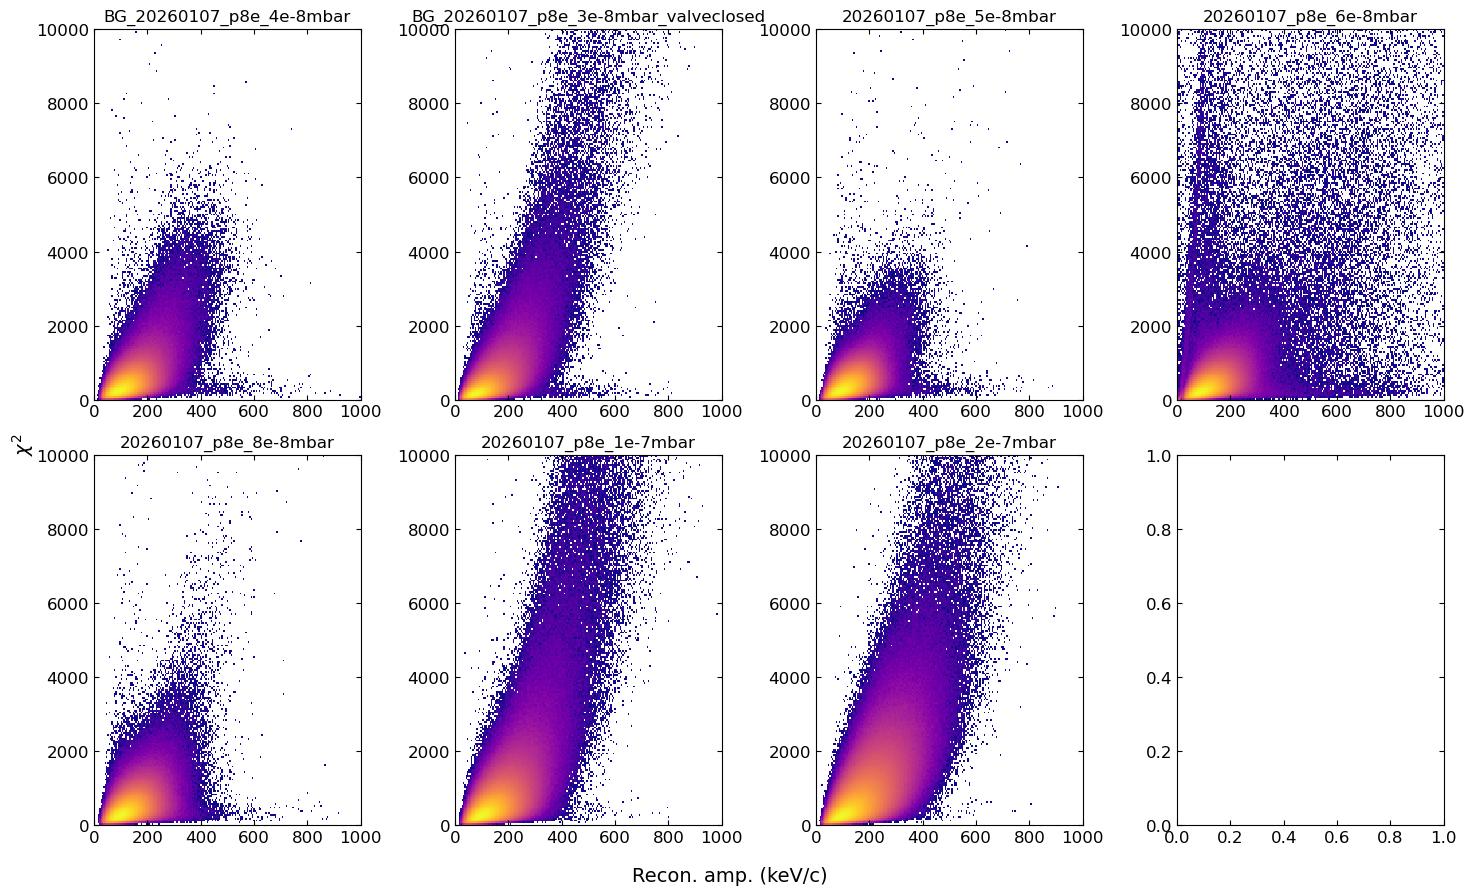

In [88]:
xbins = np.linspace(0, 1000, 200)
ybins = np.linspace(0, 10000, 200)

fig, axes = plt.subplots(2, 4, figsize=(15, 9))
for i in range(len(driven_power_all)):
    ax = axes.flatten()[i]

    hh, _, _ = np.histogram2d(x=np.concatenate(np.abs(amps_all[i])).flatten()*amp2kev, y=np.concatenate(chi2_all[i]).flatten(), bins=(xbins, ybins))
    pc = ax.pcolormesh(xbins, ybins, hh.T, norm=colors.LogNorm(), cmap='plasma')

    ax.set_title(datsets_all[i], fontsize=12)

fig.supxlabel(r'Recon. amp. (keV/c)', fontsize=14)
fig.supylabel(r'$\chi^2$', fontsize=14)
fig.tight_layout()


In [144]:
bc, hh_all_bg_0 = get_summed_histogram(amps_0, good_detection_0, noise_level_0, chi2_0, driven_power_0, f_res_0, amp2kev)
bc, hh_all_bg_1 = get_summed_histogram(amps_1, good_detection_1, noise_level_1, chi2_1, driven_power_1, f_res_1, amp2kev)

bc, hh_all_xe_0 = get_summed_histogram(amps_2, good_detection_2, noise_level_2, chi2_2, driven_power_2, f_res_2, amp2kev)
bc, hh_all_xe_1 = get_summed_histogram(amps_3, good_detection_3, noise_level_3, chi2_3, driven_power_3, f_res_3, amp2kev)
bc, hh_all_xe_2 = get_summed_histogram(amps_4, good_detection_4, noise_level_4, chi2_4, driven_power_4, f_res_4, amp2kev)
bc, hh_all_xe_3 = get_summed_histogram(amps_5, good_detection_5, noise_level_5, chi2_5, driven_power_5, f_res_5, amp2kev)
bc, hh_all_xe_4 = get_summed_histogram(amps_6, good_detection_6, noise_level_6, chi2_6, driven_power_6, f_res_6, amp2kev)


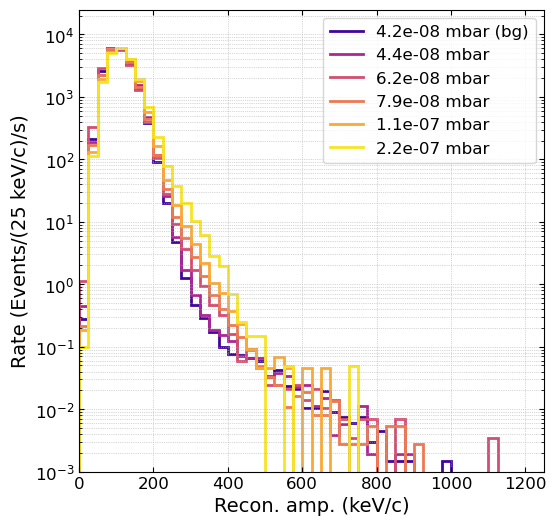

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cmap = plt.colormaps.get_cmap('plasma')
colors = cmap(np.linspace(0.1, 0.95, 7))

bins = np.arange(0, 10000, 25)
ax.stairs(hh_all_bg_0/(50e-6 * np.sum(hh_all_bg_0)), edges=bins, color=colors[0], label=f'{np.mean(pressure_0):.1e} mbar (bg)', linewidth=2)
# ax.stairs(hh_all_bg_1/(50e-6 * np.sum(hh_all_bg_1)), edges=bins, color=colors[1], label=f'{np.mean(pressure_1):.1e} mbar (bg)', linewidth=2)

ax.stairs(hh_all_xe_0/(50e-6 * np.sum(hh_all_xe_0)), edges=bins, color=colors[2], label=f'{np.mean(pressure_2):.1e} mbar', linewidth=2)
ax.stairs(hh_all_xe_1/(50e-6 * np.sum(hh_all_xe_1)), edges=bins, color=colors[3], label=f'{np.mean(pressure_3):.1e} mbar', linewidth=2)
ax.stairs(hh_all_xe_2/(50e-6 * np.sum(hh_all_xe_2)), edges=bins, color=colors[4], label=f'{np.mean(pressure_4):.1e} mbar', linewidth=2)
ax.stairs(hh_all_xe_3/(50e-6 * np.sum(hh_all_xe_3)), edges=bins, color=colors[5], label=f'{np.mean(pressure_5):.1e} mbar', linewidth=2)
ax.stairs(hh_all_xe_4/(50e-6 * np.sum(hh_all_xe_4)), edges=bins, color=colors[6], label=f'{np.mean(pressure_6):.1e} mbar', linewidth=2)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(0, 1250)
ax.set_ylim(1e-3, 2.5e4)
ax.legend()

ax.set_xlabel('Recon. amp. (keV/c)')
ax.set_ylabel('Rate (Events/(25 keV/c)/s)')

ax.grid(which='both', ls=':', linewidth=0.5)

In [ ]:
bc, hh_all_bg_0 = get_summed_histogram('20260107_p8e_4e-8mbar', 'background_data', '20260107_df_', 150, amp2kev, 100)
bc, hh_all_bg_1 = get_summed_histogram('20260107_p8e_3e-8mbar_valveclosed', 'background_data', '20260107_df_', 150, amp2kev, 100)

bc, hh_all_xe_0 = get_summed_histogram('20260107_p8e_5e-8mbar', 'xenon_data', '20260107_df_', 150, amp2kev, 100)
bc, hh_all_xe_1 = get_summed_histogram('20260107_p8e_6e-8mbar', 'xenon_data', '20260107_df_', 150, amp2kev, 100)
bc, hh_all_xe_2 = get_summed_histogram('20260107_p8e_8e-8mbar', 'xenon_data', '20260107_df_', 150, amp2kev, 100)
bc, hh_all_xe_3 = get_summed_histogram('20260107_p8e_1e-7mbar', 'xenon_data', '20260107_df_', 150, amp2kev, 100)
bc, hh_all_xe_4 = get_summed_histogram('20260107_p8e_2e-7mbar', 'xenon_data', '20260107_df_', 150, amp2kev, 100)

In [ ]:
p_bg_0 = get_average_pressure('20260107_p8e_4e-8mbar', 'background_data', '20260107_df_', 150)
p_bg_1 = get_average_pressure('20260107_p8e_3e-8mbar_valveclosed', 'background_data', '20260107_df_', 150)

p_xe_0 = get_average_pressure('20260107_p8e_5e-8mbar', 'xenon_data', '20260107_df_', 150)
p_xe_1 = get_average_pressure('20260107_p8e_6e-8mbar', 'xenon_data', '20260107_df_', 150)
p_xe_2 = get_average_pressure('20260107_p8e_8e-8mbar', 'xenon_data', '20260107_df_', 150)
p_xe_3 = get_average_pressure('20260107_p8e_1e-7mbar', 'xenon_data', '20260107_df_', 150)
p_xe_4 = get_average_pressure('20260107_p8e_2e-7mbar', 'xenon_data', '20260107_df_', 150)

p_xe = [p_xe_0, p_xe_1, p_xe_2, p_xe_3, p_xe_4]
p_xe_effective = (np.asarray([p_xe_0, p_xe_1, p_xe_2, p_xe_3, p_xe_4]) - p_bg_0) * 0.4

In [ ]:
hhs_xe = [hh_all_xe_0, hh_all_xe_1, hh_all_xe_2, hh_all_xe_3, hh_all_xe_4]

In [ ]:
def get_xe_theory(sphere_radius, pressure_mbar, sig_p_kev):
    qq_kev = np.linspace(10, 10000, 200)

    dr_dq_diffuse_xe = calc_gas.dgamma_dp_diffuse(qq_kev, 131.3, pressure_mbar, 293, 1000, 50e-9)
    dr_dq_xe = calc_gas.dgamma_dp(qq_kev, 131.3, pressure_mbar, 1, 293, 50e-9)

    qqz, drdqz = calc_gas.get_drdqz(qq_kev, dr_dq_xe)
    qqz, drdqz_diffuse = calc_gas.get_drdqz(qq_kev, dr_dq_diffuse_xe)

    # print(drdqz)
    qqzn, drdqzn_xe = calc_gas.smear_drdqz_gauss(qqz, drdqz, sig_p_kev)
    qqzn, drdqzn_diffuse_xe = calc_gas.smear_drdqz_gauss(qqz, drdqz_diffuse, sig_p_kev)

    return qqzn, drdqzn_xe, drdqzn_diffuse_xe

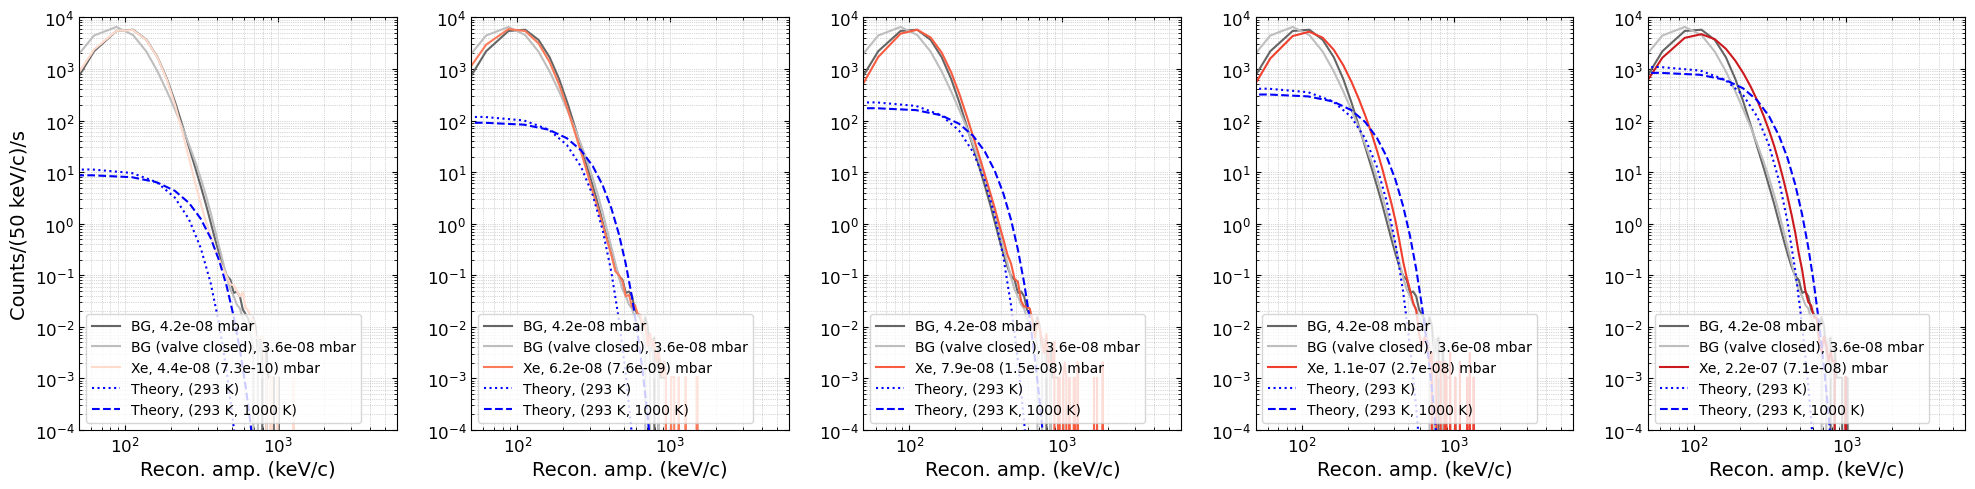

In [ ]:
cmap = plt.colormaps.get_cmap('Greys')
colors_bg = cmap((np.log(np.asarray([p_bg_0, p_bg_1])) - np.log(3e-8)) / (np.log(5e-8) - np.log(3e-8)))

cmap = plt.colormaps.get_cmap('Reds')
colors_xe = cmap((np.log(p_xe_effective) - np.log(2.5e-10)) / (np.log(5e-7) - np.log(2.5e-10)))

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.plot(bc, hh_all_bg_0/(50e-6 * np.sum(hh_all_bg_0)), color=colors_bg[0], label=f'BG, {p_bg_0:.1e} mbar')
    ax.plot(bc, hh_all_bg_1/(50e-6 * np.sum(hh_all_bg_1)), color=colors_bg[1], label=f'BG (valve closed), {p_bg_1:.1e} mbar')

    ax.plot(bc, hhs_xe[i]/(50e-6 * np.sum(hhs_xe[i])), color=colors_xe[i], label=f'Xe, {p_xe[i]:.1e} ({p_xe_effective[i]:.1e}) mbar')

    sigma_p_kev = 51.60153892357829
    qq_kev, drdqzn_xe, drdqzn_hot_xe = get_xe_theory(50e-9, p_xe_effective[i], sigma_p_kev)
    ax.plot(qq_kev, drdqzn_xe*50, 'b:', label=f'Theory, (293 K)')
    ax.plot(qq_kev, drdqzn_hot_xe*50, 'b--', label='Theory, (293 K, 1000 K)')

    ax.set_xlim(50, 6000)
    ax.set_ylim(1e-4, 1e4)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid(which='both', ls=':', linewidth=0.5)

    ax.legend(fontsize=10, loc=3)

    ax.set_xlabel('Recon. amp. (keV/c)')
axes[0].set_ylabel('Counts/(50 keV/c)/s')
fig.tight_layout()
